<a href="https://colab.research.google.com/github/feldamfh/UAP-Machine-Learning/blob/main/UAP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPLIT DATASET**

In [6]:
!pip install split-folders

In [7]:
import splitfolders
import os

# 1. Tentukan path folder asal (dataset yang masih tergabung dalam satu folder)
# Pastikan di dalam folder ini langsung berisi sub-folder kelas (misal: Level_0, Level_1, dst)
input_folder = '/content/drive/MyDrive/Prak. Pembelajaran Mesin/UAP/acne_dataset'

# 2. Tentukan path folder tujuan (tempat folder 'train' dan 'val' akan dibuat secara otomatis)
output_folder = '/content/drive/MyDrive/Prak. Pembelajaran Mesin/UAP/acne_dataset_split'

# 3. Jalankan splitting
# ratio=(.8, .2) artinya 80% untuk training dan 20% untuk validasi
splitfolders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.8, .2))

print("--- Splitting Selesai! ---")
print("Folder hasil split berada di:", output_folder)

# 4. Verifikasi jumlah file yang berhasil dipindah
def count_files(directory):
    for root, dirs, files in os.walk(directory):
        if files:
            # Menampilkan jumlah file per kelas/level
            print(f"{root}: {len(files)} gambar")

print("\n[VERIFIKASI DATA TRAIN]")
count_files(os.path.join(output_folder, 'train'))

print("\n[VERIFIKASI DATA VALIDASI]")
count_files(os.path.join(output_folder, 'val'))

Copying files: 999 files [00:14, 68.11 files/s]


--- Splitting Selesai! ---
Folder hasil split berada di: /content/drive/MyDrive/Prak. Pembelajaran Mesin/UAP/acne_dataset_split

[VERIFIKASI DATA TRAIN]
/content/drive/MyDrive/Prak. Pembelajaran Mesin/UAP/acne_dataset_split/train/Level_0: 309 gambar
/content/drive/MyDrive/Prak. Pembelajaran Mesin/UAP/acne_dataset_split/train/Level_1: 378 gambar
/content/drive/MyDrive/Prak. Pembelajaran Mesin/UAP/acne_dataset_split/train/Level_2: 111 gambar

[VERIFIKASI DATA VALIDASI]
/content/drive/MyDrive/Prak. Pembelajaran Mesin/UAP/acne_dataset_split/val/Level_0: 78 gambar
/content/drive/MyDrive/Prak. Pembelajaran Mesin/UAP/acne_dataset_split/val/Level_1: 95 gambar
/content/drive/MyDrive/Prak. Pembelajaran Mesin/UAP/acne_dataset_split/val/Level_2: 28 gambar


# **CNN**

Found 801 images belonging to 3 classes.
Found 198 images belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,680,067 (36.93 MB)

 Trainable params: 9,680,067 (36.93 MB)

 Non-trainable params: 0 (0.00 B)


Memulai proses training...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 26/156 ━━━━━━━━━━━━━━━━━━━━ 28:52 13s/step - accuracy: 0.4735 - loss: 1.1446

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


156/156 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step - accuracy: 0.4743 - loss: 1.0622 - val_accuracy: 0.4747 - val_loss: 1.0407 - learning_rate: 0.0010
Epoch 2/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.4561 - loss: 1.0010 - val_accuracy: 0.5051 - val_loss: 1.0050 - learning_rate: 0.0010
Epoch 3/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.4606 - loss: 1.0033 - val_accuracy: 0.3939 - val_loss: 1.0202 - learning_rate: 0.0010
Epoch 4/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.4649 - loss: 1.0087 - val_accuracy: 0.4747 - val_loss: 1.0271 - learning_rate: 0.0010
Epoch 5/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.4397 - loss: 1.0363 - val_accuracy: 0.4747 - val_loss: 1.0030 - learning_rate: 0.0010
Epoch 6/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - accuracy: 0.4739 - loss: 1.0078 - val_accuracy: 0.4747 - val_loss: 0.9963 - learning_rate: 0.0010
Epoch 7/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.4706 - loss: 0

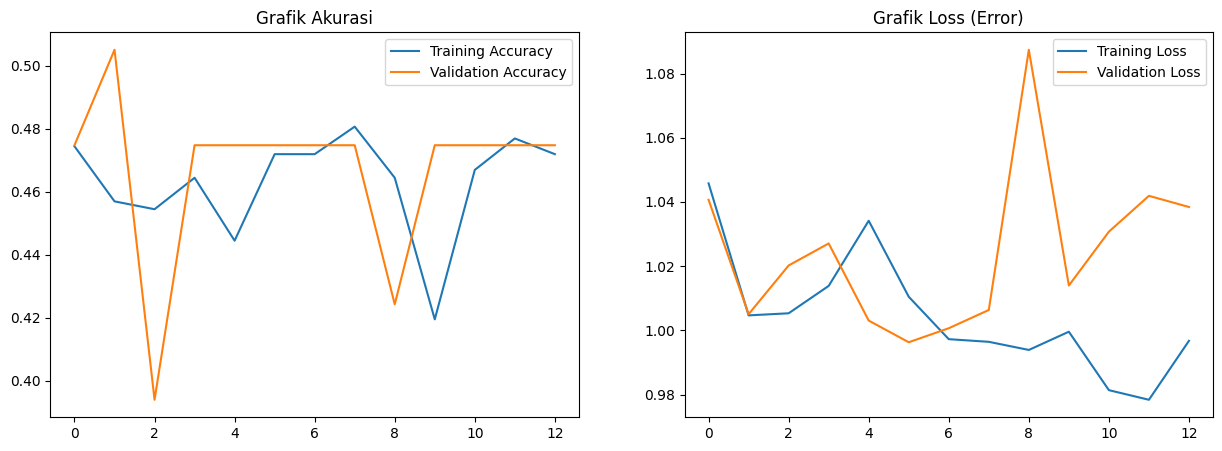

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Classification Report ---
              precision    recall  f1-score   support

     Level_0       0.00      0.00      0.00        77
     Level_1       0.47      1.00      0.64        94
     Level_2       0.00      0.00      0.00        27

    accuracy                           0.47       198
   macro avg       0.16      0.33      0.21       198
weighted avg       0.23      0.47      0.31       198


Model telah disimpan sebagai 'acne_grading_cnn_model.h5'


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

# ==========================================
# 1. KONFIGURASI DATA & PARAMETER
# ==========================================
# Ganti dengan path folder tempat Anda menyimpan dataset acne
base_dir = '/content/drive/MyDrive/Prak. Pembelajaran Mesin/UAP/acne_dataset'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
TARGET_TOTAL_DATA = 5000
EPOCHS = 50 # Early stopping akan menghentikannya jika sudah stabil

# ==========================================
# 2. DATA AUGMENTATION (Agar data mencapai >5000)
# ==========================================
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 # 20% untuk validasi
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Menghitung steps agar total gambar yang dilihat per epoch mencapai 5000
steps_per_epoch = TARGET_TOTAL_DATA // BATCH_SIZE

# ==========================================
# 3. MEMBANGUN ARSITEKTUR CNN DARI NOL
# ==========================================
model = models.Sequential([
    # Layer Input & Conv Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    # Conv Block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Conv Block 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Conv Block 4
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Classification Head
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5), # Proteksi utama terhadap overfitting
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ==========================================
# 4. CALLBACKS (Early Stopping & Reduce LR)
# ==========================================
callbacks_list = [
    EarlyStopping(
        monitor='val_loss',
        patience=7,           # Berhenti jika val_loss tidak turun selama 7 epoch
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,           # Turunkan Learning Rate jika stagnan selama 3 epoch
        min_lr=1e-6,
        verbose=1
    )
]

# ==========================================
# 5. TRAINING
# ==========================================
print("\nMemulai proses training...")
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks_list,
    verbose=1
)

# ==========================================
# 6. EVALUASI DAN VISUALISASI
# ==========================================
# Plot Akurasi & Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Grafik Akurasi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Grafik Loss (Error)')
plt.legend()
plt.show()

# ==========================================
# 7. MATRIKS EVALUASI DETAIL
# ==========================================
# Reset generator validasi untuk evaluasi akhir
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

print("\n--- Classification Report ---")
target_names = list(train_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# Simpan Model
model.save('acne_grading_cnn_model.h5')
print("\nModel telah disimpan sebagai 'acne_grading_cnn_model.h5'")

# **MobileNet**

Found 798 images belonging to 3 classes.
Found 201 images belonging to 3 classes.
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 1024)           │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,890,883 (14.84 MB)

 Trainable params: 659,459 (2.52 MB)

 Non-trainable params: 3,231,424 (12.33 MB)


Memulai Training (Transfer Learning)...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 25/156 ━━━━━━━━━━━━━━━━━━━━ 1:54 873ms/step - accuracy: 0.4363 - loss: 1.4362

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


156/156 ━━━━━━━━━━━━━━━━━━━━ 37s 181ms/step - accuracy: 0.4593 - loss: 1.3891 - val_accuracy: 0.5224 - val_loss: 0.9381 - learning_rate: 0.0010
Epoch 2/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.5447 - loss: 1.0863 - val_accuracy: 0.5920 - val_loss: 0.8342 - learning_rate: 0.0010
Epoch 3/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.5454 - loss: 1.0375 - val_accuracy: 0.6318 - val_loss: 0.7811 - learning_rate: 0.0010
Epoch 4/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.6123 - loss: 0.8691 - val_accuracy: 0.6070 - val_loss: 0.7980 - learning_rate: 0.0010
Epoch 5/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.6088 - loss: 0.8865 - val_accuracy: 0.6119 - val_loss: 0.7613 - learning_rate: 0.0010
Epoch 6/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.6310 - loss: 0.8064 - val_accuracy: 0.6766 - val_loss: 0.7329 - learning_rate: 0.0010
Epoch 7/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.6518 - loss: 0.746

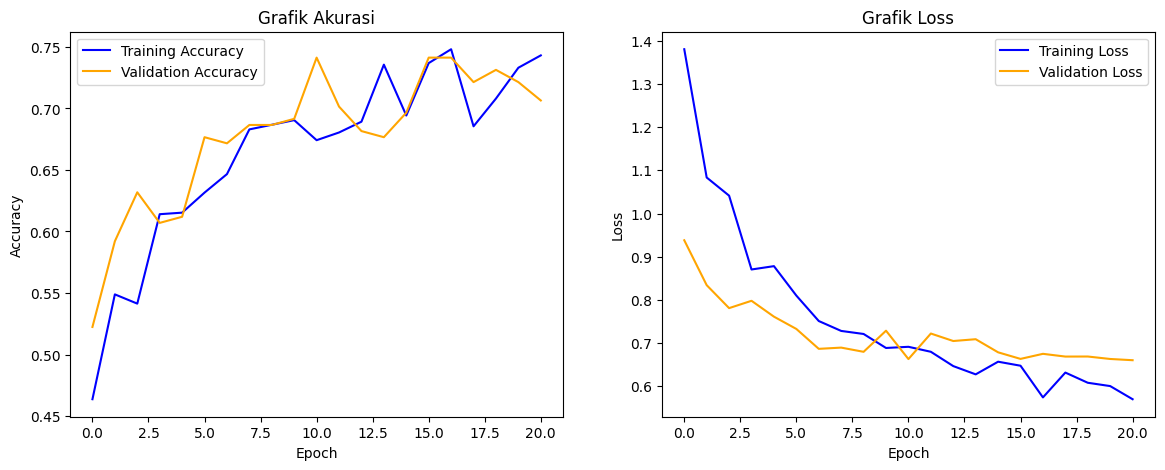

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 551ms/step

--- Classification Report ---
              precision    recall  f1-score   support

     Level_0       0.74      0.81      0.77        78
     Level_1       0.73      0.72      0.72        95
     Level_2       0.78      0.64      0.71        28

    accuracy                           0.74       201
   macro avg       0.75      0.72      0.73       201
weighted avg       0.74      0.74      0.74       201



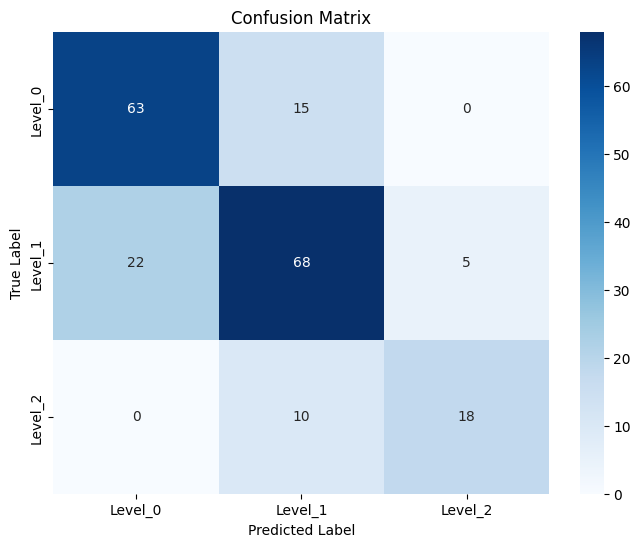


Model telah disimpan sebagai 'mobilenet_acne_final.keras'


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

# ==========================================
# 1. KONFIGURASI DATA
# ==========================================
base_dir = '/content/drive/MyDrive/Prak. Pembelajaran Mesin/UAP/acne_dataset_split'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
TARGET_DATA_PER_EPOCH = 5000

# Augmentasi Data (Train)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validasi (Hanya Rescale)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

steps_per_epoch = TARGET_DATA_PER_EPOCH // BATCH_SIZE

# ==========================================
# 2. MODEL MOBILENET (PRE-TRAINED)
# ==========================================
base_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')
base_model.trainable = False # Freeze base layer

model = models.Sequential([
    base_model,
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ==========================================
# 3. CALLBACKS
# ==========================================
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)
]

# ==========================================
# 4. TRAINING
# ==========================================
print("\nMemulai Training (Transfer Learning)...")
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

# ==========================================
# 5. EVALUASI: GRAFIK LOSS DAN ACCURACY
# ==========================================
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='orange')
plt.title('Grafik Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Grafik Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ==========================================
# 6. EVALUASI: CONFUSION MATRIX & CLASSIFICATION REPORT
# ==========================================
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes
class_labels = list(train_generator.class_indices.keys())

# Classification Report
print('\n--- Classification Report ---')
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix Visualisasi (Heatmap)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Simpan Model Final
model.save('mobilenet_acne_final.keras')
print("\nModel telah disimpan sebagai 'mobilenet_acne_final.keras'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


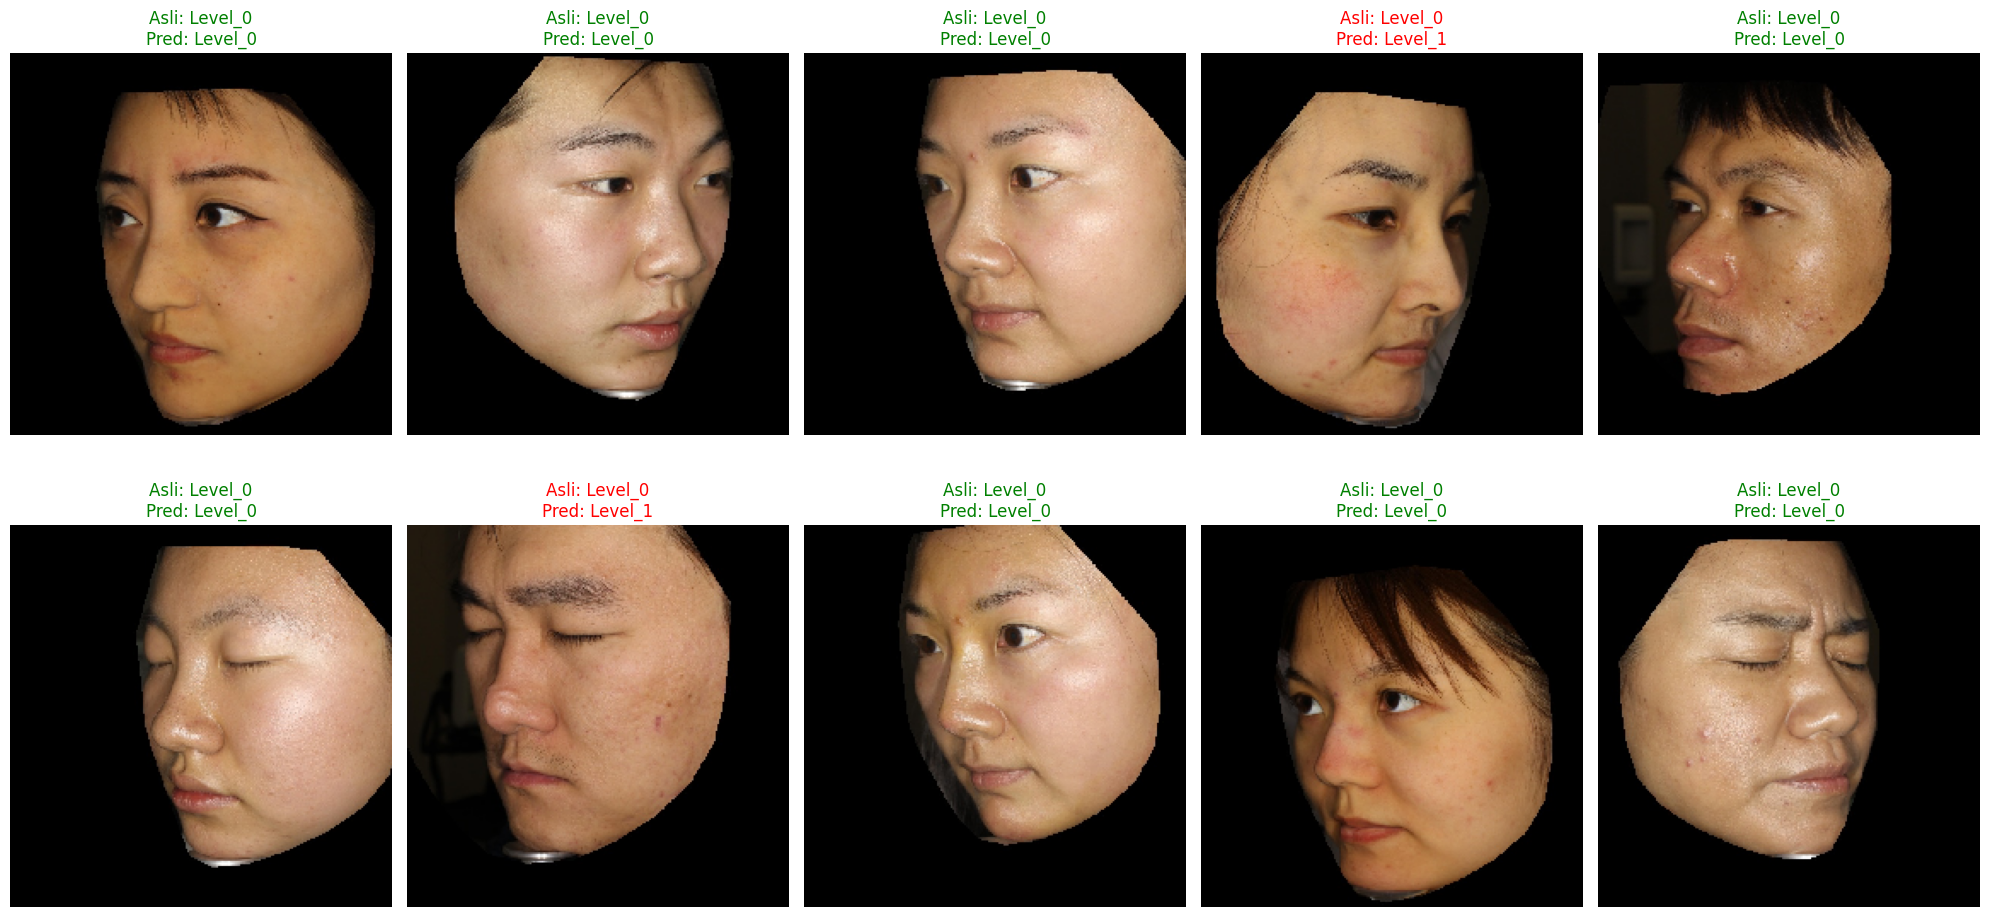

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, generator, num_images=10):
    # Mengambil satu batch data dari generator
    images, labels = next(generator)

    # Melakukan prediksi
    preds = model.predict(images)

    # Mengambil nama kelas (Level_0, Level_1, dst)
    class_names = list(generator.class_indices.keys())

    plt.figure(figsize=(20, 10))

    for i in range(min(num_images, len(images))):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])

        # Mendapatkan indeks label asli dan prediksi
        actual_idx = np.argmax(labels[i])
        pred_idx = np.argmax(preds[i])

        # Menentukan warna teks (Hijau jika benar, Merah jika salah)
        color = 'green' if actual_idx == pred_idx else 'red'

        plt.title(f"Asli: {class_names[actual_idx]}\nPred: {class_names[pred_idx]}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk melihat hasil visualnya
visualize_predictions(model, validation_generator, num_images=10)

# **RestNet50**

Found 798 images belonging to 3 classes.
Found 201 images belonging to 3 classes.

--- FASE 1: Warm-up Head Classifier ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,779,139 (94.52 MB)

 Trainable params: 1,186,307 (4.53 MB)

 Non-trainable params: 23,592,832 (90.00 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
 50/312 ━━━━━━━━━━━━━━━━━━━━ 1:41 387ms/step - accuracy: 0.4185 - loss: 2.0327

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 43s 90ms/step - accuracy: 0.4028 - loss: 1.9421 - val_accuracy: 0.4726 - val_loss: 1.4203
Epoch 2/12
312/312 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.4294 - loss: 1.6659 - val_accuracy: 0.4179 - val_loss: 1.5027
Epoch 3/12
312/312 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.4002 - loss: 1.6235 - val_accuracy: 0.4577 - val_loss: 1.4424
Epoch 4/12
312/312 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.4410 - loss: 1.5508 - val_accuracy: 0.5174 - val_loss: 1.3636
Epoch 5/12
312/312 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.4363 - loss: 1.5482 - val_accuracy: 0.4677 - val_loss: 1.3499
Epoch 6/12
312/312 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.4622 - loss: 1.4519 - val_accuracy: 0.4925 - val_loss: 1.3012
Epoch 7/12
312/312 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.4405 - loss: 1.4694 - val_accuracy: 0.3930 - val_loss: 1.3421
Epoch 8/12
312/312 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.4558 - loss: 1.4173 - val_accurac

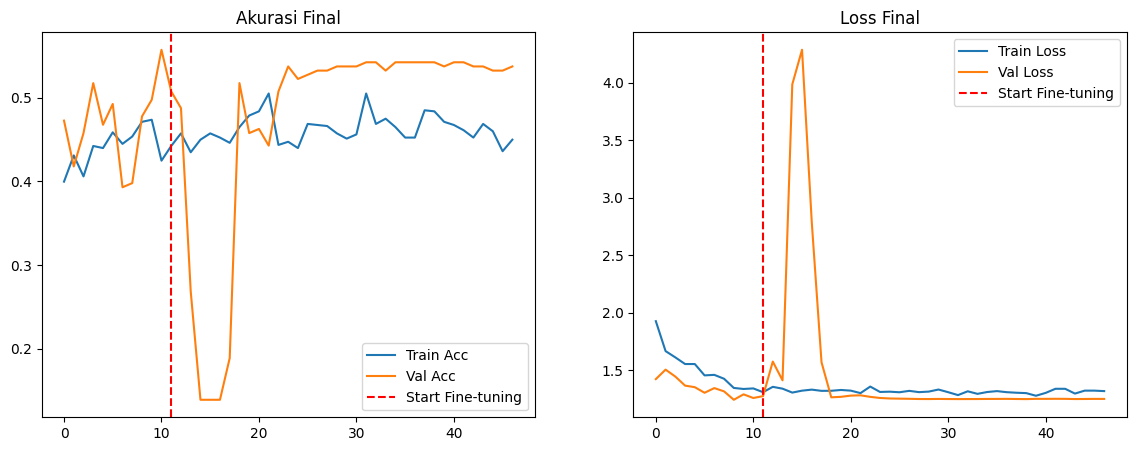

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 389ms/step

--- Classification Report ---
              precision    recall  f1-score   support

     Level_0       0.60      0.41      0.49        78
     Level_1       0.53      0.81      0.64        95
     Level_2       0.00      0.00      0.00        28

    accuracy                           0.54       201
   macro avg       0.38      0.41      0.38       201
weighted avg       0.48      0.54      0.49       201



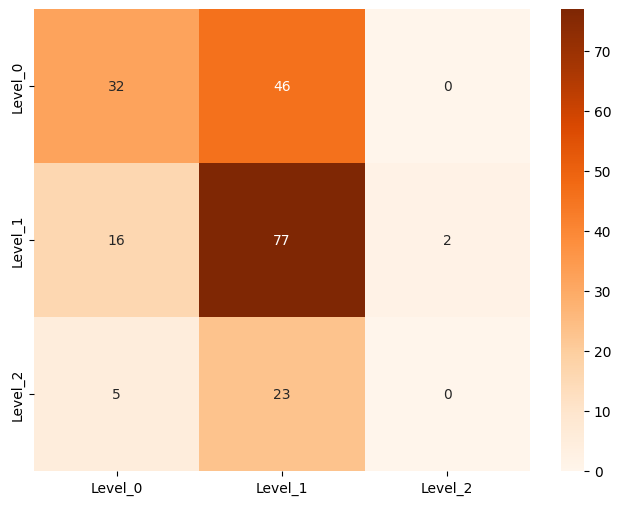


Model telah berhasil disimpan.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

# ==========================================
# 1. KONFIGURASI DATA
# ==========================================
base_dir = '/content/drive/MyDrive/Prak. Pembelajaran Mesin/UAP/acne_dataset_split'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

IMG_SIZE = (224, 224)
BATCH_SIZE = 16 # Batch kecil lebih stabil untuk Fine-tuning ResNet
TARGET_DATA_PER_EPOCH = 5000

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

steps_per_epoch = TARGET_DATA_PER_EPOCH // BATCH_SIZE

# ==========================================
# 2. MODEL RESNET50 - TAHAP 1
# ==========================================
base_resnet = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')
base_resnet.trainable = False

model = models.Sequential([
    base_resnet,
    layers.BatchNormalization(),
    layers.Dropout(0.5), # Menambah Dropout untuk mencegah overfitting
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# ==========================================
# 3. FASE 1: MELATIH HEAD (ADAM)
# ==========================================
print("\n--- FASE 1: Warm-up Head Classifier ---")
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history1 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=12,
    validation_data=validation_generator,
    verbose=1
)

# ==========================================
# 4. FASE 2: FINE-TUNING STABIL (SGD)
# ==========================================
print("\n--- FASE 2: Fine-Tuning Terkendali ---")
base_resnet.trainable = True
# Membuka hanya 20 layer terakhir (ResNet50 sangat sensitif)
for layer in base_resnet.layers[:-20]:
    layer.trainable = False

# MENGGUNAKAN SGD: Lebih lambat tapi JAUH lebih stabil untuk Fine-tuning
optimizer_fine = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)

model.compile(optimizer=optimizer_fine,
              loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-8, verbose=1),
    # Simpan model terbaik secara otomatis
    ModelCheckpoint('best_resnet_model.keras', monitor='val_accuracy', save_best_only=True)
]

history2 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=40,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

# ==========================================
# 5. EVALUASI (KOMPONEN WAJIB)
# ==========================================

# A. Visualisasi Gabungan
acc = history1.history['accuracy'] + history2.history['accuracy']
val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
loss = history1.history['loss'] + history2.history['loss']
val_loss = history1.history['val_loss'] + history2.history['val_loss']

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.axvline(x=len(history1.history['accuracy'])-1, color='r', linestyle='--', label='Start Fine-tuning')
plt.legend(); plt.title('Akurasi Final')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.axvline(x=len(history1.history['loss'])-1, color='r', linestyle='--', label='Start Fine-tuning')
plt.legend(); plt.title('Loss Final')
plt.show()

# B. Classification Report & Confusion Matrix
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
class_labels = list(train_generator.class_indices.keys())

print('\n--- Classification Report ---')
print(classification_report(validation_generator.classes, y_pred, target_names=class_labels))

cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

# Simpan Model Final
model.save('resnet50_acne_finetuned_final.keras')
print("\nModel telah berhasil disimpan.")